In [26]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import sys
import matplotlib as mpl
sys.path.append("../../analysisTools")
import plotTools as ptools
import mplhep

## Combine

### output root files

In [2]:
base="/uscms/homes/k/kyungmip/nobackup/CMSSW_11_3_4/src/HiggsAnalysis/CombinedLimit/ANv2/"

In [3]:
import os
import uproot
import pandas as pd
xs = pd.read_csv('/uscms/home/sbrightt/nobackup/iDMe/signal_xsec/MG5_aMC_v2_9_6/bin/signal_xsec_table.csv')
xs = xs[xs.alphaD=="aEM"]
xs['m1'] = xs.Mchi - xs.dMchi/2
xs['delta'] = xs.dMchi/xs.m1

In [7]:
#cut_setting = f"dPhiCut{xlim:.1f}_dxyCut{ylim:.2f}".replace(".","p")
cut_setting = 'BDT'
root_files = [f for f in os.listdir(base) if '.root' in f and cut_setting in f]

root_files

['higgsCombine.0p2_5_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_5_1_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_10_1_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_20_1_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_30_1_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_40_1_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_50_1_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_60_1_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_70_1_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_80_1_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_90_1_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_100_1_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_10_10_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_5_10_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_10_10_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_20_10_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_30_10_BDT.AsymptoticLimits.mH120.root',
 'higgsCo

In [22]:
ct_100_root_files = []
for f in root_files:
    if f.split('.')[1].split("_")[2] == '100':
        ct_100_root_files.append(f)

In [28]:
ct_10_root_files = []
for f in root_files:
    if f.split('.')[1].split("_")[2] == '10':
        ct_10_root_files.append(f)

In [23]:
ct_100_root_files

['higgsCombine.0p2_5_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_5_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_10_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_20_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_30_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_40_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_50_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_60_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_70_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_80_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_90_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_100_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_10_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_20_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_30_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_40_100_BDT.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_50_100_BDT.AsymptoticL

In [24]:
m1s = []
cts = []
deltas = []
rs = []
rs_plus1 = []
rs_minus1 = []
rs_plus2 = []
rs_minus2 = []
xsecs = []

for rf in ct_100_root_files:
    point = rf.split('.')[1]
    delta,m1,ct,SR = point.split("_")
    delta = float(delta.replace("p","."))
    m1 = float(m1.replace("p","."))
    ct = float(ct.replace("p","."))
    xsecs.append(xs[(xs.m1==m1)&(xs.delta==delta)&(xs.ct==ct)]['xsec(pb)'].iloc[0])
    deltas.append(delta)
    m1s.append(m1)
    cts.append(ct)
    with uproot.open(base+rf)['limit'] as rootf:
        lims = rootf['limit'].array().to_numpy()
        print(lims)
    rs_minus2.append(lims[0])
    rs_minus1.append(lims[1])
    rs.append(lims[2])
    rs_plus1.append(lims[3])
    rs_plus2.append(lims[4])

lims = pd.DataFrame({
    "m1":m1s,
    "ct":cts,
    "delta":deltas,
    "r":rs,
    "rp1":rs_plus1,
    "rm1":rs_minus1,
    "rp2":rs_plus2,
    "rm2":rs_minus2,
    "xsec":xsecs
})

[ 34.93847656  47.05529785  67.25        98.61318207 142.45587158
  67.07055786]
[1.72906494 2.32871246 3.328125   4.88025284 7.07044649 3.3297717 ]
[1.24200439 1.68171072 2.390625   3.51506281 5.08431768 2.39566956]
[0.82800293 1.11515808 1.59375    2.33702254 3.37604547 1.59289728]
[0.00596619 0.00761127 0.01123047 0.01588604 0.02302049 2.00612793]
[1.11212158 1.50584555 2.140625   3.14747453 4.55262423 2.14045668]
[ 2.45965576  3.31267548  4.734375    6.94233131 10.02884102  4.73182196]
[ 3.6529541   4.91981506  7.03125    10.33841991 14.95387554  7.0448922 ]
[ 5.13037109  6.90960693  9.875      14.51973629 21.00188637  9.8649831 ]
[ 6.49414062  8.74633789 12.5        18.32958794 26.40190887 12.44565165]
[ 8.05273438 10.84545898 15.5        22.79047203 32.96498489 15.48621728]
[10.06591797 13.55682373 19.375      28.48809052 41.20623398 19.35735391]
[ 26.88574219  36.20983887  51.75        76.09076691 110.06051636
  51.68563594]
[19.64477539 26.45767212 37.8125     55.59772491 80.41

In [30]:
m1s

[10.0, 5.0, 10.0, 20.0, 30.0]

In [17]:
lims

array([ 271.97460938,  366.29663086,  523.5       ,  769.72979736,
       1113.36584473,  523.10440804])

## Plot

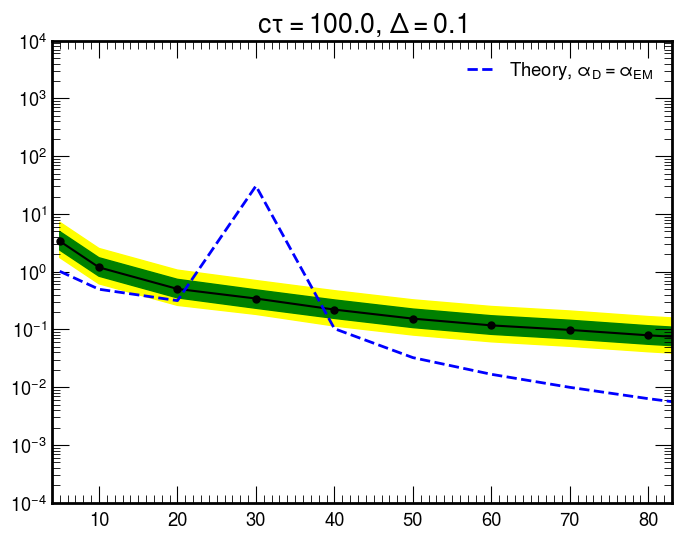

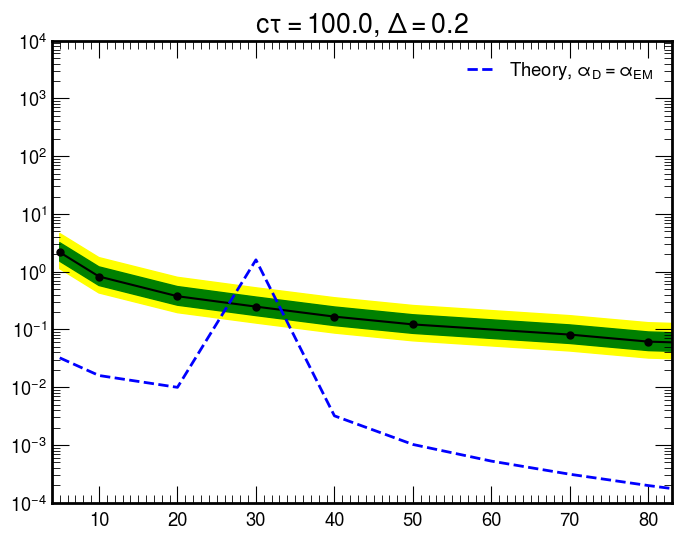

In [27]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

deltas = sorted(list(set(lims.delta)))
all_ctaus = sorted(list(set(lims.ct)))
for d in deltas:
    for i,ct in enumerate(all_ctaus):
        plt.figure(figsize=(8,6))
        mass1s = sorted(list(set(lims[(lims.delta==d)&(lims.ct==ct)].m1.array.to_numpy())))
        noms = []
        p1s = []
        m1s = []
        p2s = []
        m2s = []
        theory_xsec = xs[(xs.delta==d)&(xs.ct==ct)]["xsec(pb)"].array.to_numpy()
        theory_m1 = xs[(xs.delta==d)&(xs.ct==ct)]["m1"].array.to_numpy()
        srt = np.argsort(theory_m1)
        theory_m1 = theory_m1[srt]
        theory_xsec = theory_xsec[srt]
        for m1 in mass1s:
            r = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].r.iloc[0]
            rm1 = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].rm1.iloc[0]
            rp1 = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].rp1.iloc[0]
            rm2 = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].rm2.iloc[0]
            rp2 = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].rp2.iloc[0]
            xsec = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].xsec.iloc[0]
            noms.append(r*xsec)
            m1s.append(rm1*xsec)
            p1s.append(rp1*xsec)
            m2s.append(rm2*xsec)
            p2s.append(rp2*xsec)
        plt.title(r"$c \tau = {0}$, $\Delta = {1}$".format(ct,d))
        plt.fill_between(mass1s,m2s,p2s,color="yellow")
        plt.fill_between(mass1s,m1s,p1s,color="green")
        plt.plot(mass1s,noms,color="black",marker=".",markersize=10)
        plt.plot(theory_m1,theory_xsec,color="blue",linestyle="--",linewidth=2,label=r"Theory, $\alpha_D = \alpha_\mathrm{EM}$")
        plt.legend()
        plt.ylim([1e-4,1e4])
        plt.yscale('log')
        plt.xlim([4,83])
        ax = plt.gca()
        ax.xaxis.set_major_locator(MultipleLocator(10))
        ax.xaxis.set_major_formatter('{x:.0f}')
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        #plt.savefig(f"plots/expected_lims/delta{d}_ct{ct}_{cut_setting}.pdf")